## Application of Traffic Violation Data

In [357]:
"""
Created on Wed Mar 22 10:21:12 2017

@author: Batul Zamin
"""

'\nCreated on Wed Mar 22 10:21:12 2017\n\n@author: Batul Zamin\n'

In [169]:
# Import statements
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [170]:
# Read the data
file = '/home/user/dummy/Traffic_Violations/Traffic_Violations.csv'
df = pd.read_csv(file, dtype=object)

In [271]:
# Use the required columns from the dataset 
new_df = df[["Date Of Stop", "Location", "Gender", "Contributed To Accident", 
             "Commercial License", "Alcohol", "Belts"]]

# Selecting data from 2013 only for study
new_df.is_copy = False
new_df["Date Of Stop"] = pd.to_datetime(new_df["Date Of Stop"])
new_df = new_df[(new_df["Date Of Stop"].dt.year)==2013]

## Effect of : <br>1. Gender<br>2. Alcohol consumption<br>2. Driving license<br>3. Seat belts<br> on accidents caused across top 10 locations of US during the year 2013

In [273]:
# Select the rows from the dataframe which are contributing to accident
new_df2 = new_df[new_df["Contributed To Accident"]=='Yes']

In [274]:
# Include the top 10 locations of accidents in the dataframe
top_locations = pd.DataFrame(new_df2.groupby('Location')["Contributed To Accident"].
                             value_counts().sort_values(ascending=False)[0:10])
top_locations_updated = (top_locations.drop(['Contributed To Accident'], axis=1).
                                  reset_index().drop(['Contributed To Accident'], axis=1))
new_df2 = new_df[new_df["Location"].isin(list(top_locations_updated["Location"]))==True]

In [340]:
# Count the number of accidents caused by different gender, and caused due to comsumption of
# alcohol, not wearing seat belts and driving without license
group1 = new_df2.groupby('Location')['Gender'].value_counts().unstack().fillna(0)
group2 = new_df2.groupby('Location')['Alcohol'].value_counts().unstack().fillna(0)
group3 = new_df2.groupby('Location')['Belts'].value_counts().unstack().fillna(0)
group4 = new_df2.groupby('Location')['Commercial License'].value_counts().unstack().fillna(0)

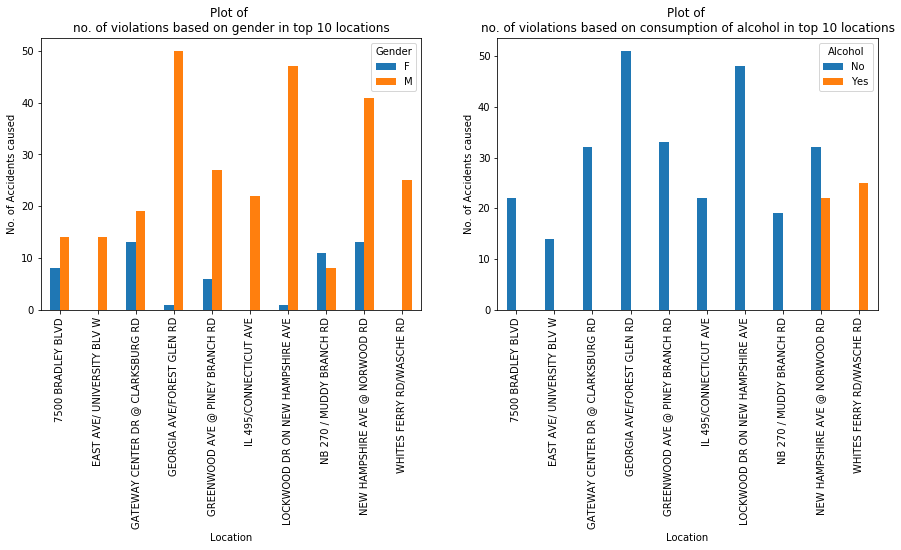

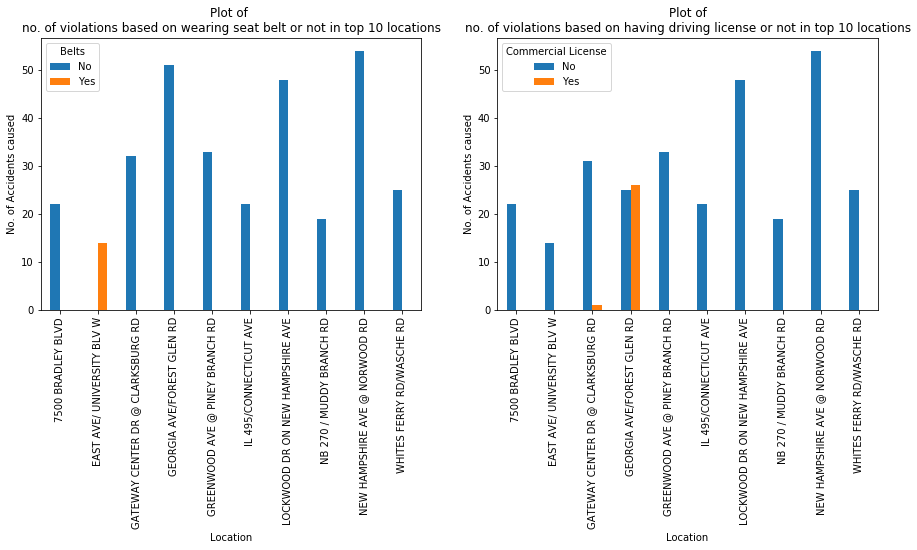

In [356]:
# Plot bar graph for each case
fig1, axes1 = plt.subplots(1,2)

plot1 = group1.plot(kind='bar', figsize=(15,5), fontsize=10, ax=axes1[0], title="""Plot of 
no. of violations based on gender in top 10 locations""")
plot1.set_xlabel("Location")
plot1.set_ylabel("No. of Accidents caused")

plot2 = group2.plot(kind='bar', figsize=(15,5), fontsize=10, ax=axes1[1], title="""Plot of 
no. of violations based on consumption of alcohol in top 10 locations""")
plot2.set_xlabel("Location")
plot2.set_ylabel("No. of Accidents caused")

fig2, axes2 = plt.subplots(1,2)

plot3 = group3.plot(kind='bar', figsize=(15,5), fontsize=10, ax=axes2[0], title="""Plot of 
no. of violations based on wearing seat belt or not in top 10 locations""")
plot3.set_xlabel("Location")
plot3.set_ylabel("No. of Accidents caused")

plot4 = group4.plot(kind='bar', figsize=(15,5), fontsize=10, ax=axes2[1], title="""Plot of
no. of violations based on having driving license or not in top 10 locations""")
plot4.set_xlabel("Location")
plot4.set_ylabel("No. of Accidents caused")